In [2]:
import dgl as d
import numpy as np
import pandas as pd
import torch as t
from node2vec import Node2Vec

In [3]:
a = t.randn(2, 3, 4)
a = t.mean(a, dim = 0)
a.shape

torch.Size([3, 4])

In [4]:
class FeatureLookup:

    def __init__(self):
        self.inner_id_counter = 0
        self.inner_bag = {}
        self.category = set()
        self.category_bags = {}
        self.inverse_map = {}

    def register(self, category, value):
        # 添加进入类别
        self.category.add(category)

        # 如果类别不存在若无则，则新增一个类别子树
        if category not in self.category_bags:
            self.category_bags[category] = {}

        # 如果值不在全局索引中，则创建之，id += 1
        if value not in self.inner_bag:
            self.inner_bag[value] = self.inner_id_counter
            self.inverse_map[self.inner_id_counter] = value
            # 如果值不存在与类别子树，则创建之
            if value not in self.category_bags[category]:
                self.category_bags[category][value] = self.inner_id_counter
            self.inner_id_counter += 1

    def query_id(self, value):
        # 返回索引id
        return self.inner_bag[value]

    def query_value(self, idx):
        # 返回值
        return self.inverse_map[idx]

    def __len__(self):
        return len(self.inner_bag)

In [5]:
userg = d.graph([])
servg = d.graph([])

In [6]:
user_lookup = FeatureLookup()
serv_lookup = FeatureLookup()

In [7]:
ufile = pd.read_csv('./datasets/data/WSDREAM/原始数据/userlist_table.csv')
ufile = pd.DataFrame(ufile)
ufile

,[User ID],[IP Address],[Country],[IP No.],[AS],[Latitude],[Longitude]
0,0,12.108.127.138,United States,208437130,"AS7018 AT&T Services, Inc.",38.0000,-97.0000
1,1,12.46.129.15,United States,204374287,"AS7018 AT&T Services, Inc.",38.0464,-122.2300
2,2,122.1.115.91,Japan,2046915419,AS4713 NTT Communications Corporation,35.6850,139.7514
3,3,128.10.19.52,United States,2148143924,AS17 Purdue University,40.4249,-86.9162
4,4,128.10.19.53,United States,2148143925,AS17 Purdue University,40.4249,-86.9162
...,...,...,...,...,...,...,...
334,334,35.9.27.26,United States,587799322,AS237 Merit Network Inc.,42.7283,-84.4882
335,335,35.9.27.27,United States,587799323,AS237 Merit Network Inc.,42.7283,-84.4882
336,336,64.161.10.2,United States,1084295682,AS7132 AT&T Internet Services,32.9722,-96.7376
337,337,64.161.10.3,United States,1084295683,AS7132 AT&T Internet Services,32.9722,-96.7376


In [8]:
ulines = ufile.to_numpy()
ulines

array([[0, '12.108.127.138', 'United States', ...,
        'AS7018 AT&T Services, Inc.', 38.0, -97.0],
       [1, '12.46.129.15', 'United States', ...,
        'AS7018 AT&T Services, Inc.', 38.0464, -122.23],
       [2, '122.1.115.91', 'Japan', ...,
        'AS4713 NTT Communications Corporation', 35.685, 139.7514],
       ...,
       [336, '64.161.10.2', 'United States', ...,
        'AS7132 AT&T Internet Services', 32.9722, -96.7376],
       [337, '64.161.10.3', 'United States', ...,
        'AS7132 AT&T Internet Services', 32.9722, -96.7376],
       [338, '72.36.112.74', 'United States', ...,
        'AS38 University of Illinois', 40.1095, -88.2123]], dtype=object)

In [9]:
sfile = pd.read_csv('./datasets/data/WSDREAM/原始数据/wslist_table.csv')
sfile = pd.DataFrame(sfile)
slines = sfile.to_numpy()
slines = slines

In [10]:
for i in range(339):
    user_lookup.register('User', i)

for j in range(5825):
    serv_lookup.register('Serv', j)

for ure in ulines[:, 2]:
    user_lookup.register('URE', ure)

for uas in ulines[:, 4]:
    user_lookup.register('UAS', uas)

for sre in slines[:, 4]:
    serv_lookup.register('SRE', sre)

for spr in slines[:, 2]:
    serv_lookup.register('SPR', spr)

for sas in slines[:, 6]:
    serv_lookup.register('SAS', sas)


In [11]:
user_lookup.category_bags.keys()

dict_keys(['User', 'URE', 'UAS'])

In [12]:
user_lookup.inner_id_counter

507

In [13]:
user_lookup.inner_bag

{0: 0,
 1: 1,
 2: 2,
 3: 3,
 4: 4,
 5: 5,
 6: 6,
 7: 7,
 8: 8,
 9: 9,
 10: 10,
 11: 11,
 12: 12,
 13: 13,
 14: 14,
 15: 15,
 16: 16,
 17: 17,
 18: 18,
 19: 19,
 20: 20,
 21: 21,
 22: 22,
 23: 23,
 24: 24,
 25: 25,
 26: 26,
 27: 27,
 28: 28,
 29: 29,
 30: 30,
 31: 31,
 32: 32,
 33: 33,
 34: 34,
 35: 35,
 36: 36,
 37: 37,
 38: 38,
 39: 39,
 40: 40,
 41: 41,
 42: 42,
 43: 43,
 44: 44,
 45: 45,
 46: 46,
 47: 47,
 48: 48,
 49: 49,
 50: 50,
 51: 51,
 52: 52,
 53: 53,
 54: 54,
 55: 55,
 56: 56,
 57: 57,
 58: 58,
 59: 59,
 60: 60,
 61: 61,
 62: 62,
 63: 63,
 64: 64,
 65: 65,
 66: 66,
 67: 67,
 68: 68,
 69: 69,
 70: 70,
 71: 71,
 72: 72,
 73: 73,
 74: 74,
 75: 75,
 76: 76,
 77: 77,
 78: 78,
 79: 79,
 80: 80,
 81: 81,
 82: 82,
 83: 83,
 84: 84,
 85: 85,
 86: 86,
 87: 87,
 88: 88,
 89: 89,
 90: 90,
 91: 91,
 92: 92,
 93: 93,
 94: 94,
 95: 95,
 96: 96,
 97: 97,
 98: 98,
 99: 99,
 100: 100,
 101: 101,
 102: 102,
 103: 103,
 104: 104,
 105: 105,
 106: 106,
 107: 107,
 108: 108,
 109: 109,
 110: 110,

In [14]:
user_lookup.category_bags.keys()

dict_keys(['User', 'URE', 'UAS'])

In [15]:
user_lookup.category_bags

{'User': {0: 0,
  1: 1,
  2: 2,
  3: 3,
  4: 4,
  5: 5,
  6: 6,
  7: 7,
  8: 8,
  9: 9,
  10: 10,
  11: 11,
  12: 12,
  13: 13,
  14: 14,
  15: 15,
  16: 16,
  17: 17,
  18: 18,
  19: 19,
  20: 20,
  21: 21,
  22: 22,
  23: 23,
  24: 24,
  25: 25,
  26: 26,
  27: 27,
  28: 28,
  29: 29,
  30: 30,
  31: 31,
  32: 32,
  33: 33,
  34: 34,
  35: 35,
  36: 36,
  37: 37,
  38: 38,
  39: 39,
  40: 40,
  41: 41,
  42: 42,
  43: 43,
  44: 44,
  45: 45,
  46: 46,
  47: 47,
  48: 48,
  49: 49,
  50: 50,
  51: 51,
  52: 52,
  53: 53,
  54: 54,
  55: 55,
  56: 56,
  57: 57,
  58: 58,
  59: 59,
  60: 60,
  61: 61,
  62: 62,
  63: 63,
  64: 64,
  65: 65,
  66: 66,
  67: 67,
  68: 68,
  69: 69,
  70: 70,
  71: 71,
  72: 72,
  73: 73,
  74: 74,
  75: 75,
  76: 76,
  77: 77,
  78: 78,
  79: 79,
  80: 80,
  81: 81,
  82: 82,
  83: 83,
  84: 84,
  85: 85,
  86: 86,
  87: 87,
  88: 88,
  89: 89,
  90: 90,
  91: 91,
  92: 92,
  93: 93,
  94: 94,
  95: 95,
  96: 96,
  97: 97,
  98: 98,
  99: 99,
  100: 100,


In [16]:
serv_lookup.category_bags.keys()

dict_keys(['Serv', 'SRE', 'SPR', 'SAS'])

In [17]:
serv_lookup.category_bags

{'Serv': {0: 0,
  1: 1,
  2: 2,
  3: 3,
  4: 4,
  5: 5,
  6: 6,
  7: 7,
  8: 8,
  9: 9,
  10: 10,
  11: 11,
  12: 12,
  13: 13,
  14: 14,
  15: 15,
  16: 16,
  17: 17,
  18: 18,
  19: 19,
  20: 20,
  21: 21,
  22: 22,
  23: 23,
  24: 24,
  25: 25,
  26: 26,
  27: 27,
  28: 28,
  29: 29,
  30: 30,
  31: 31,
  32: 32,
  33: 33,
  34: 34,
  35: 35,
  36: 36,
  37: 37,
  38: 38,
  39: 39,
  40: 40,
  41: 41,
  42: 42,
  43: 43,
  44: 44,
  45: 45,
  46: 46,
  47: 47,
  48: 48,
  49: 49,
  50: 50,
  51: 51,
  52: 52,
  53: 53,
  54: 54,
  55: 55,
  56: 56,
  57: 57,
  58: 58,
  59: 59,
  60: 60,
  61: 61,
  62: 62,
  63: 63,
  64: 64,
  65: 65,
  66: 66,
  67: 67,
  68: 68,
  69: 69,
  70: 70,
  71: 71,
  72: 72,
  73: 73,
  74: 74,
  75: 75,
  76: 76,
  77: 77,
  78: 78,
  79: 79,
  80: 80,
  81: 81,
  82: 82,
  83: 83,
  84: 84,
  85: 85,
  86: 86,
  87: 87,
  88: 88,
  89: 89,
  90: 90,
  91: 91,
  92: 92,
  93: 93,
  94: 94,
  95: 95,
  96: 96,
  97: 97,
  98: 98,
  99: 99,
  100: 100,


In [18]:
len(user_lookup)

507

In [19]:
len(serv_lookup)

9591

In [20]:
userg.add_nodes(len(user_lookup))
servg.add_nodes(len(serv_lookup))

In [21]:
ulines

array([[0, '12.108.127.138', 'United States', ...,
        'AS7018 AT&T Services, Inc.', 38.0, -97.0],
       [1, '12.46.129.15', 'United States', ...,
        'AS7018 AT&T Services, Inc.', 38.0464, -122.23],
       [2, '122.1.115.91', 'Japan', ...,
        'AS4713 NTT Communications Corporation', 35.685, 139.7514],
       ...,
       [336, '64.161.10.2', 'United States', ...,
        'AS7132 AT&T Internet Services', 32.9722, -96.7376],
       [337, '64.161.10.3', 'United States', ...,
        'AS7132 AT&T Internet Services', 32.9722, -96.7376],
       [338, '72.36.112.74', 'United States', ...,
        'AS38 University of Illinois', 40.1095, -88.2123]], dtype=object)

In [22]:
for line in ulines:
    uid = line[0]
    ure = user_lookup.query_id(line[2])

    if not userg.has_edges_between(uid, ure):
        userg.add_edges(uid, ure)

    uas = user_lookup.query_id(line[4])
    if not userg.has_edges_between(uid, uas):
        userg.add_edges(uid, uas)

In [23]:
sfile

,[Service ID],[WSDL Address],[Service Provider],[IP Address],[Country],[IP No.],[AS],[Latitude],[Longitude]
0,0,http://ewave.no-ip.com/ECallws/CinemaData.asmx...,no-ip.com,8.23.224.110,United States,135782510,AS3356 Level 3 Communications,38.0000,-97.0000
1,1,http://ewave.no-ip.com/ECallws/StadiumSinchron...,no-ip.com,8.23.224.110,United States,135782510,AS3356 Level 3 Communications,38.0000,-97.0000
2,2,http://ewave.no-ip.com/EcallWS/CinemaSinchroni...,no-ip.com,8.23.224.110,United States,135782510,AS3356 Level 3 Communications,38.0000,-97.0000
3,3,http://ewave.no-ip.com/ECallws/StadiumData.asm...,no-ip.com,8.23.224.110,United States,135782510,AS3356 Level 3 Communications,38.0000,-97.0000
4,4,http://ewave.no-ip.com/ECallws/BuyerData.asmx?...,no-ip.com,8.23.224.110,United States,135782510,AS3356 Level 3 Communications,38.0000,-97.0000
...,...,...,...,...,...,...,...,...,...
5820,5820,http://www.vareliefsale.com/VRS-Web/Global/Sec...,vareliefsale.com,70.33.130.247,United States,1176601335,AS7795 Ntelos Inc.,38.1103,-78.9073
5821,5821,http://www.vfri.org/VFRI-Web/Global/SecureLogi...,vfri.org,70.33.130.66,United States,1176601154,AS7795 Ntelos Inc.,38.1103,-78.9073
5822,5822,http://www.vmrc.org/VMRCPortal/Global/SecureLo...,vmrc.org,67.192.82.114,United States,1136677490,AS33070 Rackspace Hosting,29.4889,-98.3987
5823,5823,http://www.wysecommunicator.com/Global/SecureL...,wysecommunicator.com,70.33.130.66,United States,1176601154,AS7795 Ntelos Inc.,38.1103,-78.9073


In [24]:
# for line in slines:
#     sid = line[0]
#     sre = serv_lookup.query_id(line[4])
#     if not servg.has_edges_between(sid, sre):
#         servg.add_edges(sid, sre)
#
#     sas = serv_lookup.query_id(line[6])
#     if not servg.has_edges_between(sid, sas):
#         servg.add_edges(sid, sas)
#
#     spr = serv_lookup.query_id(line[2])
#     if not servg.has_edges_between(sid, spr):
#         servg.add_edges(sid, spr)

In [25]:
userg, servg

(Graph(num_nodes=507, num_edges=678,
       ndata_schemes={}
       edata_schemes={}),
 Graph(num_nodes=9591, num_edges=0,
       ndata_schemes={}
       edata_schemes={}))

In [26]:
userg = d.add_self_loop(userg)
userg = d.to_bidirected(userg)
servg = d.add_self_loop(servg)
servg = d.to_bidirected(servg)

In [27]:
userg, servg

(Graph(num_nodes=507, num_edges=1863,
       ndata_schemes={}
       edata_schemes={}),
 Graph(num_nodes=9591, num_edges=9591,
       ndata_schemes={}
       edata_schemes={}))

In [28]:
import torch
import torch.nn as nn
from sklearn.linear_model import LogisticRegression
from torch.utils.data import DataLoader

from dgl.sampling import node2vec_random_walk

class Node2vec(nn.Module):
    """Node2vec model from paper node2vec: Scalable Feature Learning for Networks <https://arxiv.org/abs/1607.00653>
    Attributes
    ----------
    g: DGLGraph
        The graph.
    embedding_dim: int
        Dimension of node embedding.
    walk_length: int
        Length of each trace.
    p: float
        Likelihood of immediately revisiting a node in the walk.  Same notation as in the paper.
    q: float
        Control parameter to interpolate between breadth-first strategy and depth-first strategy.
        Same notation as in the paper.
    num_walks: int
        Number of random walks for each node. Default: 10.
    window_size: int
        Maximum distance between the center node and predicted node. Default: 5.
    num_negatives: int
        The number of negative samples for each positive sample.  Default: 5.
    use_sparse: bool
        If set to True, use PyTorch's sparse embedding and optimizer. Default: ``True``.
    weight_name : str, optional
        The name of the edge feature tensor on the graph storing the (unnormalized)
        probabilities associated with each edge for choosing the next node.

        The feature tensor must be non-negative and the sum of the probabilities
        must be positive for the outbound edges of all nodes (although they don't have
        to sum up to one).  The result will be undefined otherwise.

        If omitted, DGL assumes that the neighbors are picked uniformly.
    """

    def __init__(
        self,
        g,
        embedding_dim,
        walk_length,
        p,
        q,
        num_walks=10,
        window_size=5,
        num_negatives=5,
        use_sparse=True,
        weight_name=None,
    ):
        super(Node2vec, self).__init__()

        assert walk_length >= window_size

        self.g = g
        self.embedding_dim = embedding_dim
        self.walk_length = walk_length
        self.p = p
        self.q = q
        self.num_walks = num_walks
        self.window_size = window_size
        self.num_negatives = num_negatives
        self.N = self.g.num_nodes()
        if weight_name is not None:
            self.prob = weight_name
        else:
            self.prob = None

        self.embedding = nn.Embedding(self.N, embedding_dim, sparse=use_sparse)

    def reset_parameters(self):
        self.embedding.reset_parameters()

    def sample(self, batch):
        """
        Generate positive and negative samples.
        Positive samples are generated from random walk
        Negative samples are generated from random sampling
        """
        if not isinstance(batch, torch.Tensor):
            batch = torch.tensor(batch)

        batch = batch.repeat(self.num_walks)
        # positive
        pos_traces = node2vec_random_walk(self.g, batch, self.p, self.q, self.walk_length, self.prob)
        pos_traces = pos_traces.unfold(1, self.window_size, 1)  # rolling window
        pos_traces = pos_traces.contiguous().view(-1, self.window_size)

        # negative
        neg_batch = batch.repeat(self.num_negatives)
        neg_traces = torch.randint(self.N, (neg_batch.size(0), self.walk_length))
        neg_traces = torch.cat([neg_batch.view(-1, 1), neg_traces], dim=-1)
        neg_traces = neg_traces.unfold(1, self.window_size, 1)  # rolling window
        neg_traces = neg_traces.contiguous().view(-1, self.window_size)

        return pos_traces, neg_traces

    def forward(self, nodes=None):
        """
        Returns the embeddings of the input nodes
        Parameters
        ----------
        nodes: Tensor, optional
            Input nodes, if set `None`, will return all the node embedding.

        Returns
        -------
        Tensor
            Node embedding

        """
        emb = self.embedding.weight
        if nodes is None:
            return emb
        else:
            return emb[nodes]

    def loss(self, pos_trace, neg_trace):
        """
        Computes the loss given positive and negative random walks.
        Parameters
        ----------
        pos_trace: Tensor
            positive random walk trace
        neg_trace: Tensor
            negative random walk trace

        """
        e = 1e-15

        # Positive
        pos_start, pos_rest = (pos_trace[:, 0], pos_trace[:, 1:].contiguous())  # start node and following trace
        w_start = self.embedding(pos_start).unsqueeze(dim=1)
        w_rest = self.embedding(pos_rest)
        pos_out = (w_start * w_rest).sum(dim=-1).view(-1)

        # Negative
        neg_start, neg_rest = neg_trace[:, 0], neg_trace[:, 1:].contiguous()

        w_start = self.embedding(neg_start).unsqueeze(dim=1)
        w_rest = self.embedding(neg_rest)
        neg_out = (w_start * w_rest).sum(dim=-1).view(-1)

        # compute loss
        pos_loss = -torch.log(torch.sigmoid(pos_out) + e).mean()
        neg_loss = -torch.log(1 - torch.sigmoid(neg_out) + e).mean()

        return pos_loss + neg_loss

    def loader(self, batch_size):
        """

        Parameters
        ----------
        batch_size: int
            batch size

        Returns
        -------
        DataLoader
            Node2vec training data loader

        """
        return DataLoader(
            torch.arange(self.N),
            batch_size = batch_size,
            shuffle = True,
            collate_fn = self.sample,
        )

class Node2vecModel(object):
    """
    Wrapper of the ``Node2Vec`` class with a ``train`` method.
    Attributes
    ----------
    g: DGLGraph
        The graph.
    embedding_dim: int
        Dimension of node embedding.
    walk_length: int
        Length of each trace.
    p: float
        Likelihood of immediately revisiting a node in the walk.
    q: float
        Control parameter to interpolate between breadth-first strategy and depth-first strategy.
    num_walks: int
        Number of random walks for each node. Default: 10.
    window_size: int
        Maximum distance between the center node and predicted node. Default: 5.
    num_negatives: int
        The number of negative samples for each positive sample.  Default: 5.
    use_sparse: bool
        If set to True, uses PyTorch's sparse embedding and optimizer. Default: ``True``.
    weight_name : str, optional
        The name of the edge feature tensor on the graph storing the (unnormalized)
        probabilities associated with each edge for choosing the next node.

        The feature tensor must be non-negative and the sum of the probabilities
        must be positive for the outbound edges of all nodes (although they don't have
        to sum up to one).  The result will be undefined otherwise.

        If omitted, DGL assumes that the neighbors are picked uniformly. Default: ``None``.

    eval_set: list of tuples (Tensor, Tensor)
        [(nodes_train,y_train),(nodes_val,y_val)]
        If omitted, model will not be evaluated. Default: ``None``.

    eval_steps: int
        Interval steps of evaluation.
        if set <= 0, model will not be evaluated. Default: ``None``.
    device: str
        device, default 'cpu'.
    """

    def __init__(self, g, embedding_dim,
        walk_length,
        p=1.0,
        q=1.0,
        num_walks=1,
        window_size=5,
        num_negatives=5,
        use_sparse=True,
        weight_name=None,
        device = "cpu",
    ):

        self.model = Node2vec(
            g,
            embedding_dim,
            walk_length,
            p,
            q,
            num_walks,
            window_size,
            num_negatives,
            use_sparse,
            weight_name,
        )

        self.g = g

        self.use_sparse = use_sparse

        if device == "cpu":
            self.device = device
        else:
            self.device = "cuda" if torch.cuda.is_available() else "cpu"

    def _train_step(self, model, loader, optimizer, device):

        model.train()
        total_loss = 0

        for pos_traces, neg_traces in loader:
            pos_traces, neg_traces = pos_traces.to(device), neg_traces.to(device)
            optimizer.zero_grad()
            loss = model.loss(pos_traces, neg_traces)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        return total_loss / len(loader)

    def train(self, epochs, batch_size, learning_rate=0.01):
        """
        Parameters
        ----------
        epochs: int
            num of train epoch
        batch_size: int
            batch size
        learning_rate: float
            learning rate. Default 0.01.

        """
        self.model = self.model.to(self.device)
        loader = self.model.loader(batch_size)

        if self.use_sparse:
            optimizer = torch.optim.SparseAdam(list(self.model.parameters()), lr=learning_rate)
        else:
            optimizer = torch.optim.Adam(self.model.parameters(), lr=learning_rate)

        for i in range(epochs):
            loss = self._train_step(self.model, loader, optimizer, self.device)
            print( "Epoch: {}, Train Loss: {:.4f}".format(i, loss))

    def embedding(self, nodes=None):
        """
        Returns the embeddings of the input nodes
        Parameters
        ----------
        nodes: Tensor, optional
            Input nodes, if set `None`, will return all the node embedding.
        Returns
        -------
        Tensor
            Node embedding.
        """
        return self.model(nodes)

In [29]:
def TestUndirect(graph):
    # config
    #===================================================
    embedding_dim = 32
    walk_length = 5
    p = 1
    q = 0.5
    num_walks = 1
    epochs = 1
    batch_size = 1
    device = 'cpu'
    #===================================================

    trainer = Node2vecModel(
        graph,
        embedding_dim = embedding_dim,
        walk_length = walk_length,
        p = p,
        q = q,
        num_walks = num_walks,
        # weight_name = 'w',
        device = device,
    )

    trainer.train(epochs = epochs, batch_size = batch_size, learning_rate = 0.01)

    node_features = trainer.embedding()

    nodes = node_features.detach().to('cpu').numpy()

    return nodes

In [30]:
# node2vec
def eraser(datasets, args):
    userg = d.graph([])
    user_lookup = FeatureLookup()
    ufile = pd.read_csv('./datasets/data/WSDREAM/原始数据/userlist_table.csv')
    ufile = pd.DataFrame(ufile)
    ulines = ufile.to_numpy()

    for i in range(339):
        user_lookup.register('User', i)

    for ure in ulines[:, 2]:
        user_lookup.register('URE', ure)

    for uas in ulines[:, 4]:
        user_lookup.register('UAS', uas)

    userg.add_nodes(len(user_lookup))

    for line in ulines:
        uid = line[0]
        ure = user_lookup.query_id(line[2])

        if not userg.has_edges_between(uid, ure):
            userg.add_edges(uid, ure)

        uas = user_lookup.query_id(line[4])
        if not userg.has_edges_between(uid, uas):
            userg.add_edges(uid, uas)

    userg = d.add_self_loop(userg)
    userg = d.to_bidirected(userg)

    ans = np.array(TestUndirect(userg))
    ans = ans[: 339]

    y, x = np.array(ulines[:, 5], dtype='float32'), np.array(ulines[:, 6], dtype='float32')
    data = np.array([x, y]).T

    df = np.concatenate((ans, data), axis=1)

    def k_mean(inputs, k):
        from sklearn.cluster import KMeans
        kmeans = KMeans(n_clusters = k)
        kmeans.fit(inputs)
        return kmeans.labels_

    label = k_mean(df, args)[:339]

    split_train_Tensor = []

    for i in range(args):
        split_tensor = np.zeros_like(datasets)
        idx = (label == i).nonzero()[0]
        for id in idx:
            split_tensor[id] = datasets[id]
        split_train_Tensor.append(split_tensor)

    return split_train_Tensor

In [31]:
import pickle as pk
df = pk.load(open('./datasets/data/WSDREAM/rt.pk', 'rb'))

In [32]:
ans = eraser(df, 10)

Epoch: 0, Train Loss: 3.8113


In [50]:
from node2vec import Node2Vec

G = userg.to_networkx()

# 设置node2vec参数
node2vec = Node2Vec(G, 
                    dimensions=128,  # 嵌入维度
                    p=1,            # 回家参数
                    q=0.5,          # 外出参数
                    walk_length=10, # 随机游走最大长度
                    num_walks=50,  # 每个节点作为起始节点生成的随机游走个数
                    workers=4       # 并行线程数
                   )

# p=1, q=0.5, n_clusters=6。DFS深度优先搜索，挖掘同质社群
# p=1, q=2, n_clusters=3。BFS宽度优先搜索，挖掘节点的结构功能。

# 训练Node2Vec，参数文档见 gensim.models.Word2Vec
model = node2vec.fit(window=3,    # Skip-Gram窗口大小
                     min_count=1,  # 忽略出现次数低于此阈值的节点（词）
                     batch_words=4 # 每个线程处理的数据量
                    )
                    
X = model.wv.vectors

Computing transition probabilities:   0%|          | 0/507 [00:00<?, ?it/s]

In [46]:
X.shape

(507, 128)

In [49]:
X = X[:339]
print(type(X))

<class 'numpy.ndarray'>


In [57]:
df = pk.load(open('./pretrain/user_based_10.pk',  'rb'))
dic = {}
for i in df:
    if i not in dic:
        dic[i] = 1
    else:
        dic[i] = dic[i] + 1
dic

{0: 162, 2: 45, 1: 34, 3: 34, 4: 11, 8: 14, 5: 10, 9: 13, 6: 11, 7: 5}

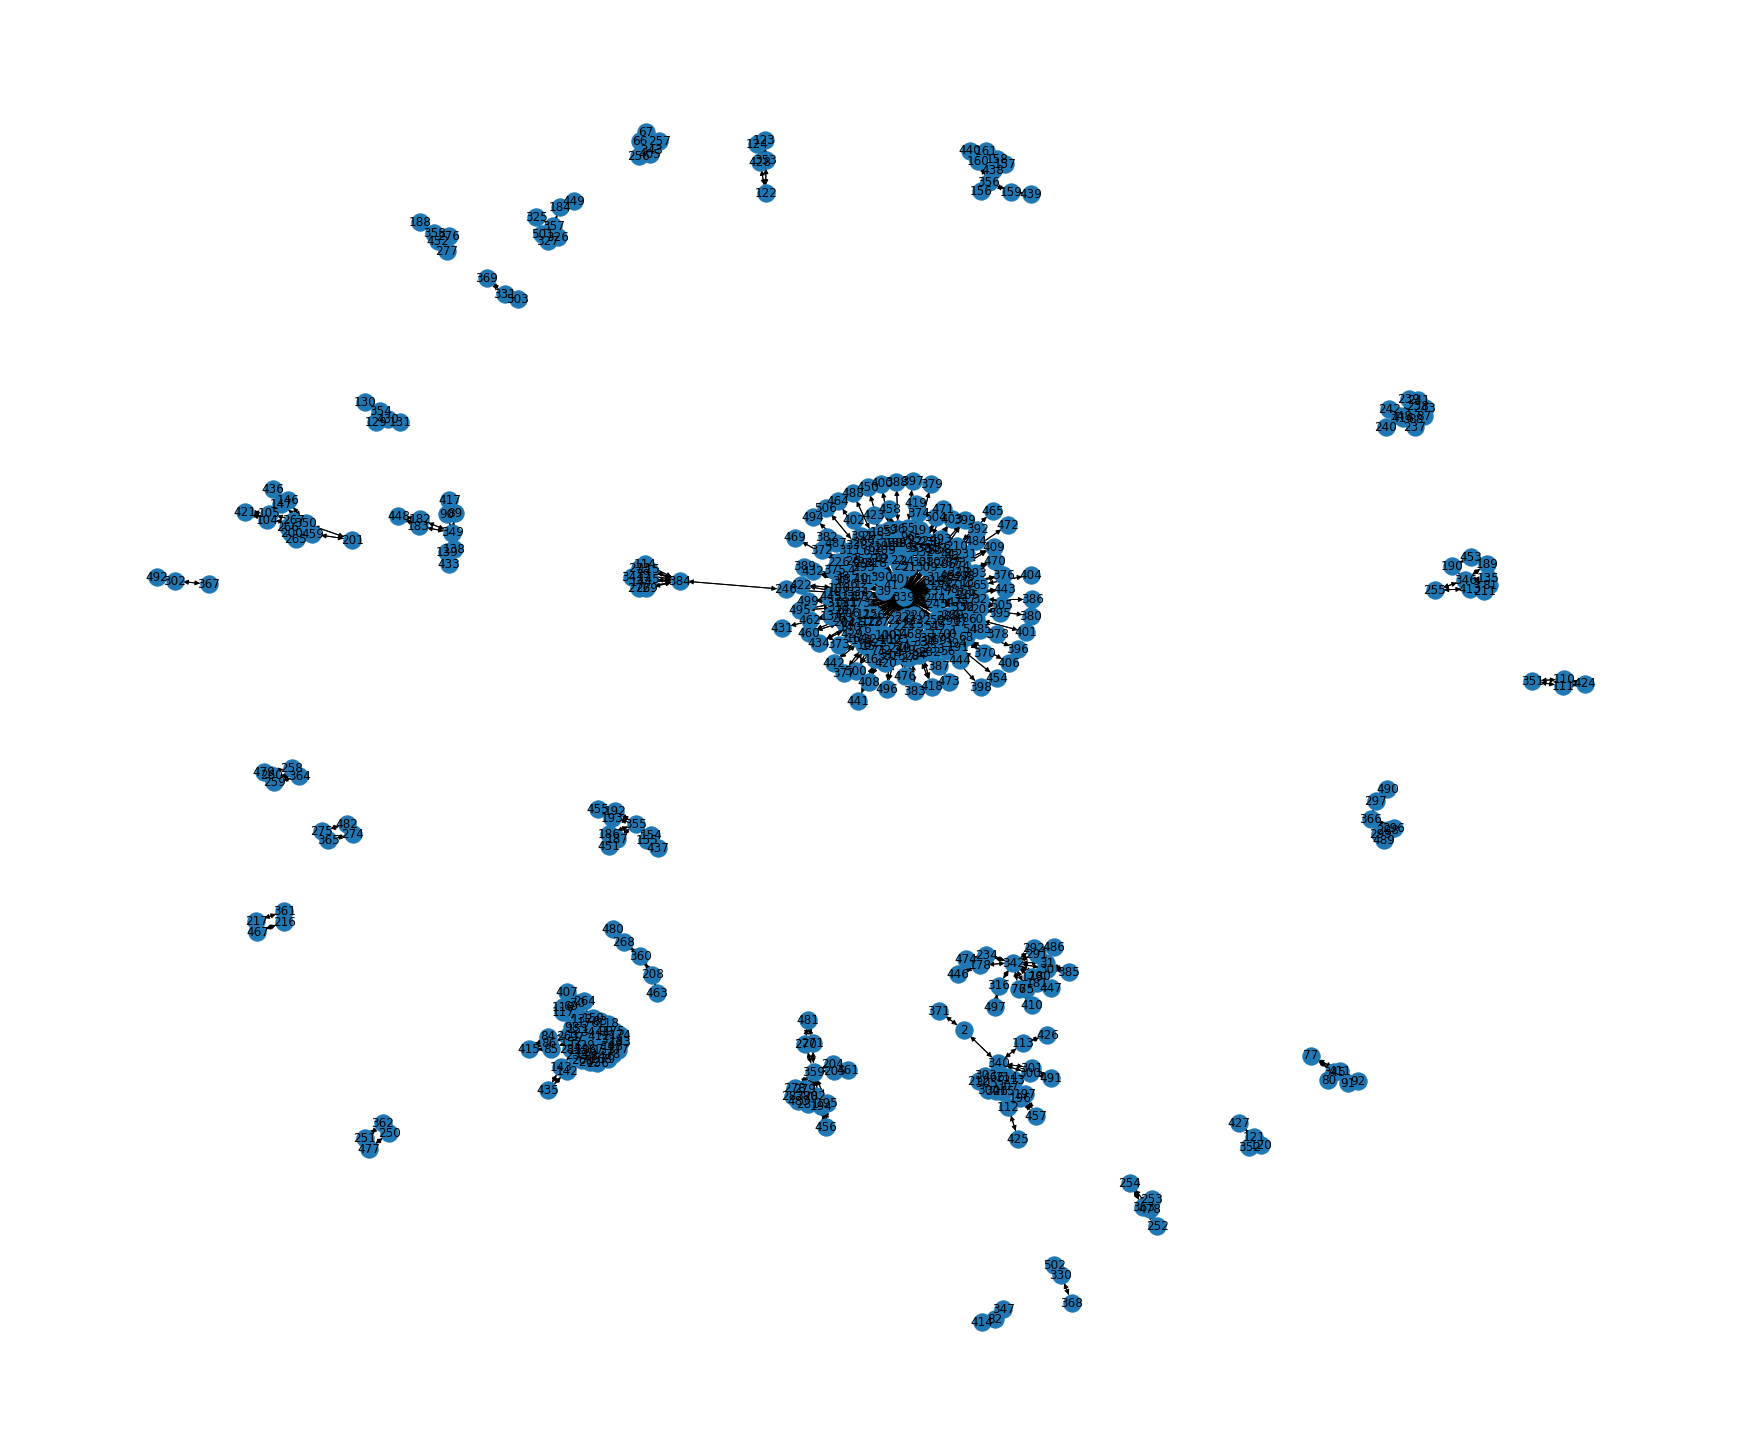

In [35]:
import networkx as nx
import matplotlib.pyplot as plt
plt.figure(figsize=(24, 20))
nx.draw(userg.to_networkx(), with_labels = True)
plt.show()

In [36]:
ulines

array([[0, '12.108.127.138', 'United States', ...,
        'AS7018 AT&T Services, Inc.', 38.0, -97.0],
       [1, '12.46.129.15', 'United States', ...,
        'AS7018 AT&T Services, Inc.', 38.0464, -122.23],
       [2, '122.1.115.91', 'Japan', ...,
        'AS4713 NTT Communications Corporation', 35.685, 139.7514],
       ...,
       [336, '64.161.10.2', 'United States', ...,
        'AS7132 AT&T Internet Services', 32.9722, -96.7376],
       [337, '64.161.10.3', 'United States', ...,
        'AS7132 AT&T Internet Services', 32.9722, -96.7376],
       [338, '72.36.112.74', 'United States', ...,
        'AS38 University of Illinois', 40.1095, -88.2123]], dtype=object)

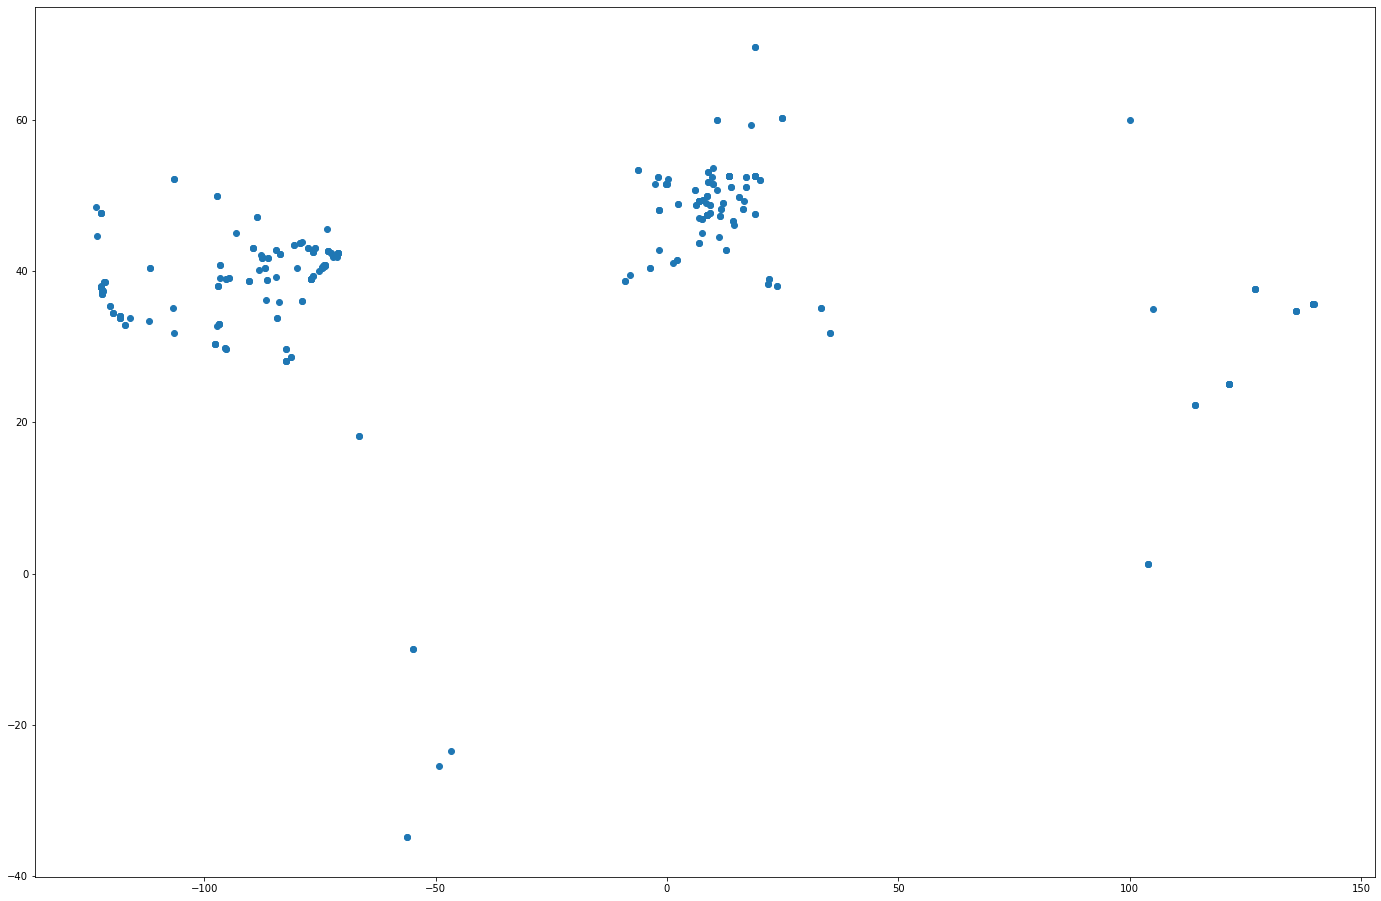

In [37]:
y, x = np.array(ulines[:, 5], dtype = 'float32'), np.array(ulines[:, 6], dtype = 'float32')
plt.figure(figsize = (24, 16))
plt.scatter(x, y)
plt.show()

In [38]:
from sklearn.cluster import KMeans

def k_mean(data, k):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(data)

    return kmeans.labels_


In [39]:
ans = np.array(TestUndirect(userg))
ans = ans[:339]
ans

Epoch: 0, Train Loss: 3.6179


array([[-0.45072487, -0.18536244,  0.74417394, ..., -0.5842349 ,
         0.08008966,  1.3995101 ],
       [-0.36392012, -0.97805715,  0.3053014 , ...,  0.3903629 ,
         0.74767864,  0.06949542],
       [-1.2390013 , -0.56593674, -0.02974138, ...,  0.18360104,
         0.6921365 ,  0.2535333 ],
       ...,
       [ 1.2104375 , -1.0752202 , -0.09164443, ...,  0.15018521,
         0.62808627, -0.9237387 ],
       [ 0.67631876,  1.6534896 ,  0.27488598, ...,  0.16716398,
        -0.37916994,  0.90193635],
       [-0.7011233 , -1.2905027 ,  0.51697963, ..., -0.11381023,
         0.4854146 ,  0.8611011 ]], dtype=float32)

In [40]:
data = np.array([x, y]).T
data

array([[-9.700000e+01,  3.800000e+01],
       [-1.222300e+02,  3.804640e+01],
       [ 1.397514e+02,  3.568500e+01],
       [-8.691620e+01,  4.042490e+01],
       [-8.691620e+01,  4.042490e+01],
       [-1.198371e+02,  3.443290e+01],
       [-1.198371e+02,  3.443290e+01],
       [-1.198371e+02,  3.443290e+01],
       [-7.465970e+01,  4.037560e+01],
       [-7.465970e+01,  4.037560e+01],
       [-1.220603e+02,  3.698990e+01],
       [-1.220603e+02,  3.698990e+01],
       [-1.220603e+02,  3.698990e+01],
       [-7.252310e+01,  4.238040e+01],
       [-7.252310e+01,  4.238040e+01],
       [-8.760270e+01,  4.178040e+01],
       [-8.760270e+01,  4.178040e+01],
       [-1.117325e+02,  4.035630e+01],
       [-1.117325e+02,  4.035630e+01],
       [-1.232790e+02,  4.456420e+01],
       [-7.995610e+01,  4.044390e+01],
       [-1.222919e+02,  4.766060e+01],
       [-1.222919e+02,  4.766060e+01],
       [-1.222919e+02,  4.766060e+01],
       [-1.222919e+02,  4.766060e+01],
       [-7.659670e+01,  3

In [41]:
df = np.concatenate((ans, data), axis = 1)
df

array([[-4.5072487e-01, -1.8536244e-01,  7.4417394e-01, ...,
         1.3995101e+00, -9.7000000e+01,  3.8000000e+01],
       [-3.6392012e-01, -9.7805715e-01,  3.0530140e-01, ...,
         6.9495425e-02, -1.2223000e+02,  3.8046398e+01],
       [-1.2390013e+00, -5.6593674e-01, -2.9741377e-02, ...,
         2.5353330e-01,  1.3975140e+02,  3.5685001e+01],
       ...,
       [ 1.2104375e+00, -1.0752202e+00, -9.1644429e-02, ...,
        -9.2373872e-01, -9.6737602e+01,  3.2972198e+01],
       [ 6.7631876e-01,  1.6534896e+00,  2.7488598e-01, ...,
         9.0193635e-01, -9.6737602e+01,  3.2972198e+01],
       [-7.0112330e-01, -1.2905027e+00,  5.1697963e-01, ...,
         8.6110109e-01, -8.8212303e+01,  4.0109501e+01]], dtype=float32)

In [42]:
label = k_mean(df, 10)

In [43]:
label

array([4, 0, 2, 4, 4, 0, 0, 0, 7, 7, 0, 0, 0, 7, 7, 4, 4, 0, 0, 0, 7, 0,
       0, 0, 0, 7, 7, 4, 4, 9, 0, 0, 7, 4, 4, 4, 7, 4, 4, 7, 7, 7, 7, 7,
       7, 4, 4, 4, 4, 7, 7, 7, 7, 7, 4, 4, 0, 4, 4, 4, 4, 7, 7, 4, 4, 0,
       1, 1, 4, 9, 9, 4, 4, 4, 4, 7, 7, 9, 1, 1, 9, 9, 1, 1, 9, 9, 9, 9,
       9, 1, 1, 1, 1, 0, 0, 0, 0, 9, 9, 9, 4, 4, 4, 4, 9, 9, 4, 4, 0, 0,
       6, 6, 2, 2, 9, 9, 9, 9, 1, 1, 7, 7, 5, 5, 5, 7, 7, 7, 7, 8, 8, 8,
       9, 9, 7, 9, 0, 0, 1, 1, 7, 7, 1, 1, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       6, 6, 8, 8, 8, 8, 8, 8, 4, 7, 7, 7, 7, 1, 1, 4, 4, 4, 4, 4, 1, 1,
       1, 1, 0, 7, 7, 7, 1, 1, 2, 4, 6, 6, 1, 9, 9, 0, 6, 6, 1, 1, 2, 2,
       7, 7, 9, 9, 7, 7, 1, 1, 4, 4, 1, 7, 4, 9, 2, 2, 2, 2, 3, 3, 7, 7,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 0, 4, 4, 7, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 4, 4, 9, 0, 0, 0, 9, 9, 9, 9, 9, 9, 1, 1, 1, 1, 1, 1, 1, 1,
       9, 9, 9, 9, 1, 9, 1, 1, 9, 9, 6, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 4, 4, 4, 4, 4, 0, 0, 7, 3, 3, 3, 3, 2,